# Introdução 

O objetivo deste notebook é a estatistica. Seja ela descritiva ou regressiva. Fazendo algumas definições, citando alguns teoremas importantes, ajustar dados, propor hipóteses e testa-las. 

A base de dados utilizada será a base PeNSE 2015 do [IBGE](https://www.ibge.gov.br/) sobre saude e educação, disponível em: 

> https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/

A amostra que vamos utilizar é a `PeNSE_2015_AMOSTRA2.zip`

## PeNSE (Pesquisa Nacional de Saúde do Escolar)

A pesquisa PeNSE é uma pesquisa feita por amostragem que permite conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescente , é feita utilizando dados para a seleção de escolas publicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.

É fruto de uma parceria entre os Ministérios da Saúde e Educação. A pesquisa fornece informações sobre características básicas da população de estudo, incluindo aspectos socioecnômicos, como escolaridade dos pais, inserção no mercado de trabalho e posse de bens e serviços; fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas; saúde sexual e reprodutiva; exposição a acidentes e violências; hábitos de higiene; saúde bucal; saúde mental;... dentre vaŕias outras informações. 

### Tipo dos dados:
---

## Notas Metodológicas

---

## Importações de módulos

In [1]:
import pandas as pd 
import numpy as np 

## Importações de Dados

Aqui eu estou usando o Jupyter notebook mas em muitos casos pode-se utilizar o Google Colaboratory, onde é possível montar a imagem do Google Drive e fazer uso dos dados armazenados no Drive. Inclusive é possível armazenar um `.csv` dentro de um `.zip` e conseguir ler ele com o método `.read_csv()` do pandas. Para realizar o unZip do de um arquivo zip podemos usar a biblioteca `zipfile`.

> Lembrando que as ferramentas de Cloud podem ser pagas, ou seja, ter a capacidade de ler arquivos mesmo que zipados pode poupar dinheiro em algumas situações.

Outro método bastante importante do arquivo do tipo ZipFile é o `ZipFile.infolist()` que lista todos os arquivos dentro dele ou o `ZipFile.namelist()`

In [2]:
from zipfile import ZipFile

zip_file = ZipFile('./dados/PeNSE_2015_AMOSTRA2.zip')

for arquivo in zip_file.namelist():
    print(arquivo)

arquivos csv/
arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV
arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV
arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV
arquivos sas/
arquivos sas/pense_amostra2_aluno.sas7bdat
arquivos sas/pense_amostra2_alunoescola.sas7bdat
arquivos sas/pense_amostra2_escola.sas7bdat
arquivos xlsx/
arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx
arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx
arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx
Dicionario_PENSE_Microdados_AMOSTRA2.xls


Note que podemos verificar exatamente quais arquivos compõem o zip. O `namelist()`é uma lista com o nome dos arquivos, então podemos selecionar um elemento desta lista e fornece-lo ao `zip_file.open(arquivo_desejado)`

In [3]:
caminho_arquivo_desejado = zip_file.namelist()[1]
caminho_arquivo_desejado

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [4]:
dados = pd.read_csv(zip_file.open(caminho_arquivo_desejado), sep=';', thousands='.',decimal=',')

In [5]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


É possível também descompactar a pasta via terminal, seja ele numa célula do *jupyter* ou numa célula do *colaboratory*. 

In [6]:
dados.shape

(16556, 181)

Temos 16556 registros (linhas) e 181 variáveis (colunas).

Vamos analisar quais dados temos:

In [7]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

Note que temos alguns códigos, para entender o que significa cada código precisamos de um dicionário de dados. Ou também podemos "adivinhar" os tipos de dados de cada variável

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


Temos 7 variáveis do tipo `float64`, 171 variáveis do tipo `int64` e 3 variáveis do tipo `object`. Vamos investigar o que são essas variáveis do tipo object realizando um `select`na base de dados:

In [9]:
dados.select_dtypes(include='object')

""
0
1
2
3
4
...
16551
16552
16553
16554


> `VB17003`: Peso do estudante, incluindo os imputados, com uma casa decimal 

>`VB17004`:	Altura do estudante, incluindo os imputados, com uma casa decimal

Então vou alterar a importação dos dados adicionando os parâmetros: 

```python
dados = pd.read_csv(zip_file.open(caminho_arquivo_desejado), sep=';', thousands='.',decimal=',')
```

### Desafio: Classificar os dados em qualitativos e quantitativos. Discretos ou contínuos, nominais ou ordinais.

----

>`TEMPODESLOC`	Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.

>`TEMPOEDFIS`Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar fez atividade física ou esporte durante as aulas de educação física na escola. Em minutos.

> `TEMPOEXTRA`	Refere-se ao tempo médio diário acumulado pelo escolar com a prática de alguma atividade física extraescolar como esportes, dança, ginástica, musculação, lutas ou outra atividade, nos últimos sete dias anteriores à data da pesquisa. Em minutos

> `TEMPOTOTAL`	A atividade física acumulada foi estimada calculando o produto entre o número de dias e o tempo médio que os escolares gastam em atividades físicas, nos sete dias anteriores à pesquisa, considerando os seguintes domínios: ir e voltar da escola, aulas de educação física e outras atividades extraescolares. Em minutos.

> `TEMPOEST`	A atividade física globalmente estimada refere-se ao número de dias que os escolares declararam fazer, pelo menos, uma hora por dia de atividade física, nos sete dias anteriores à pesquisa. Em minutos.

In [10]:
dicionario_dados = pd.read_excel('./dados/Dicionario_PENSE_Microdados_AMOSTRA2.xls')

In [11]:
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

### Variáveis que vamos seleciona:

> `VB01001`:	Qual é o seu sexo?
    > * 1	Masculino
    > * 2	Feminino

> `VB01002`:	Qual é a sua cor ou raça?
    > * 1	Branca
    > * 2	Preta
    > * 3	Amarela
    > * 4	Parda
    > * 5	Indígena
    > *99	Não informado
    
> `VB01022`	Em que turno você estuda?
    > * 1	Manhã
    > * 2	Intermediário
    > * 3	Tarde
    > * 4	Noite
    > * 5	Integral
    > * 99	Não informado

> `VB01013`	Na sua casa tem telefone fixo (convencional)?
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB01014`	Você tem celular?
    > * 1	SiM
    > * 2	Não
    > * 99	Não informado

> `VB01015A` Na sua casa tem computador (de mesa, ou netbook, laptop, etc)?
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB01016`	Você tem acesso à internet em sua casa?
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado
    
> `VB01008A`	Qual nível de ensino (grau) sua mãe estudou ou estuda?
    > * 1	Minha mãe não estudou
    > * 2	Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou
    > * 3	Minha mãe terminou o ensino fundamental ou 1º grau
    > * 4	Minha mãe começou o ensino médio ou 2º grau, mas não terminou
    > * 5	Minha mãe terminou o ensino médio ou 2° grau
    > * 6	Minha mãe começou a faculdade (ensino superior), mas não terminou
    > * 7	Minha mãe terminou a faculdade (ensino superior)
    > * 8	Não sei
    > * 99	Não informado
    
> `VB04006A`	Algum de seus pais ou responsáveis fuma? 
    > * -1	Pulo no questionário
    > * 1	Nenhum deles 
    > * 2	Só meu pai ou responsável do sexo masculino 
    > * 3	Só minha mãe ou responsável do sexo feminino 
    > * 4	Meu pai e minha mãe ou responsáveis 
    > * 5	Não sei
    > * 99	Não informado

> `VB05002`	Alguma vez na vida você tomou uma dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não 
    > * 99	Não informado

> `VB07010`	Você já sofreu bullying?
    > * 1	Sim
    > * 2	Não
    > * 3	Não sei o que é bullying
    > * 99	Não informado

> `VB12001`	NOS ÚLTIMOS 12 MESES com que frequência tem se sentido sozinho(a)? 
    > * 1	Nunca
    > * 2	Raramente
    > * 3	Às vezes
    > * 4	Na maioria das vezes
    > * 5	Sempre
    > * 99	Não informado

> `VB12003`	Quantos amigos(as) próximos você tem?
    > * 1	Nenhum amigo (0)
    > * 2	1 amigo
    > * 3	2 amigos
    > * 4	3 ou mais amigos
    > * 99	Não informado

> `VB08001`	Você já teve relação sexual (transou) alguma vez?
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB08011`	Você usou preservativo na primeira relação sexual?
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB08008`	Na escola, você já recebeu orientação sobre prevenção de gravidez?
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 3	Não sei
    > * 99	Não informado

> `VB08009`	Na escola, você já recebeu orientação sobre AIDS ou outras Doenças Sexualmente Transmissíveis (DST)?
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 3	Não sei
    > * 99	Não informado

> `VB09016`	Alguma vez na vida você foi forçado a ter relação sexual? 
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB13005`	Como você classificaria seu estado de saúde?
    > * 1	Muito bom
    > * 2	Bom
    > * 3	Regular
    > * 4	Ruim
    > * 5	Muito ruim
    > * 99	Não informado

> `VB11006`	Você considera sua imagem corporal como sendo algo:
    > * 1	Muito importante
    > * 2	Importante
    > * 3	Pouco importante
    > * 4	Sem importância
    > * 99	Não informado

> `VB11007`	Como você se sente em relação ao seu corpo?
    > * 1	Muito satisfeito(a)
    > * 2	Satisfeito(a)
    > * 3	Indiferente
    > * 4	Insatisfeito(a)
    > * 5	Muito insatisfeito(a)
    > * 99	Não informado

> VB17001	Qual é o peso do(a) aluno(a)?
    > * 0 a 2999	Peso
    > * 998	Não informado
    > * 9999	Recusa ou impossibilidade de medição

> `VB17002`	Qual é a altura do(a) aluno(a)?
    0 a 2999	Peso
    998	Não informado
    9999	Recusa ou impossibilidade de medição

> `VB17006`	Variável identificadora do estado nutricional do estudante, onde: déficit de peso=1
> * 1	Deficit de peso
> * 2	Eutrofia
> * 3	Sobrepeso
> * 4	Obesidade


> `V0006`	Situação da escola
    > * 1	Urbana
    > * 2	Rural

> `V0007`	Dependência Administrativa da escola
    > * 1	Pública
    > * 2	Privada

> `V0008`	Esfera Administrativa da escola
    > * 1	Municipal
    > * 2	Estadual
    > * 3	Federal
    > * 4	Privada
    
> `V0041`	Tipo de escola privada
    > * -1	Pulo no questionário
    > * 1	Particular
    > * 2	Comunitária
    > * 3	Confessional
    > * 4	Filantrópica

In [12]:
selecao = {'VB01001':'sexo',
           'VB01002':'cor',
           'VB01022':'turno',
           'VB01013':'telefone fixo',
           'VB01014':'celular',
           'VB01015A':'computador',
           'VB01016':'internet',
           'VB01008A':'escolaridade mae',
           'VB04006A':'responsáveis fuma',
           'VB05002':'usou bebida alcoolica',
           'VB07010':'sofreu bullying',
           'VB12001':'frequência com que se sente só',
           'VB12003':'Quantos amigos próximos',
           'VB08001':'teve relação sexual alguma vez',
           'VB08011':'usou preservativo na primeira relação',
           'VB08009':'ja recebeu orientação sobre DST na escola',
           'VB09016':'ja foi forçado a ter relação sexual', 
           'VB13005':'como classifica o proprio estado de saúde',
           'VB11006':'considera sua imagem corporal como sendo algo',
           'VB11007':'como se sente em relação ao seu corpo',
           'VB17003':'peso do aluno',
           'VB17004':'altura do aluno',
           'VB17006':'estado nutricional do estudante',
           'V0006':'Situação da escola',
           'V0007':'Dependência Administrativa da escola',
           'V0008':'Esfera Administrativa da escola'
          }

In [13]:
dados_selecionados = dados[selecao.keys()]
dados_selecionados.columns = selecao.values()

In [14]:
dados_selecionados

,sexo,cor,turno,telefone fixo,celular,computador,internet,escolaridade mae,responsáveis fuma,usou bebida alcoolica,...,ja foi forçado a ter relação sexual,como classifica o proprio estado de saúde,considera sua imagem corporal como sendo algo,como se sente em relação ao seu corpo,peso do aluno,altura do aluno,estado nutricional do estudante,Situação da escola,Dependência Administrativa da escola,Esfera Administrativa da escola
0,2,1,1,1,1,1,1,7,1,2,...,2,1,1,2,37.1,157.0,1,1,2,4
1,2,1,1,1,1,1,1,7,2,2,...,2,3,3,2,50.2,152.0,2,1,2,4
2,1,4,1,2,1,1,1,5,1,1,...,2,2,1,2,48.2,161.4,2,1,2,4
3,1,1,1,1,1,1,1,7,1,2,...,2,1,1,2,69.4,172.5,3,1,2,4
4,1,1,1,2,1,1,1,5,1,1,...,1,2,1,4,78.9,167.5,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2,4,1,1,1,1,1,7,-1,-1,...,-1,1,1,1,56.7,167.9,2,1,2,4
16552,1,1,1,2,1,1,1,7,1,2,...,2,2,1,2,61.9,185.8,2,1,2,4
16553,1,4,1,1,2,1,1,7,2,2,...,2,1,4,1,60.9,159.4,3,1,2,4
16554,1,4,1,1,1,1,1,7,2,1,...,2,1,3,2,47.3,157.8,2,1,2,4


In [15]:
dados_selecionados['sexo'].value_counts(normalize=True) * 100 

1    50.054361
2    49.945639
Name: sexo, dtype: float64

Note que a proporção entre homens e mulheres esta normal.

### Vamos montar tabelas de frequencias e percentuais

> `VB11007`	Como você se sente em relação ao seu corpo?
    > * 1	Muito satisfeito(a)
    > * 2	Satisfeito(a)
    > * 3	Indiferente
    > * 4	Insatisfeito(a)
    > * 5	Muito insatisfeito(a)
    > * 99	Não informado

In [16]:
percentual_satisfacao_corpo = dados_selecionados['como se sente em relação ao seu corpo'].value_counts(normalize=True)
frequencia_satisfacao_corpo = dados_selecionados['como se sente em relação ao seu corpo'].value_counts()

distribucao_frequencia_satisfacao_corpo = pd.DataFrame({'frequencia': frequencia_satisfacao_corpo,
                                                       'percentual': percentual_satisfacao_corpo * 100})

respostas_satisfacao_corpo = {
    1:'Muito satisfeito(a)',
    2:'Satisfeito(a)',
    3:'Indiferente',
    4:'Insatisfeito(a)',
    5:'Muito insatisfeito(a)',
    99:'Não informado'
}

distribucao_frequencia_satisfacao_corpo.rename(index=respostas_satisfacao_corpo, inplace=True)
distribucao_frequencia_satisfacao_corpo.rename_axis(index='Sentimento em relação ao corpo')

,frequencia,percentual
Sentimento em relação ao corpo,,
Satisfeito(a),6920,41.797536
Muito satisfeito(a),4608,27.832810
Insatisfeito(a),2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito(a),714,4.312636
Não informado,181,1.093259


### Desafio: 
> Criar uma função para gerar as tabelas e fazer uma análise das variáveis escolhidas.

In [17]:
def cria_tabela_frequencia_percentuais(series : pd.Series , classificacoes : dict, rotulo : str ):
    percentual = series.value_counts(normalize=True) * 100
    frequencia = series.value_counts()
    
    tab1 = pd.DataFrame({'frequencia':frequencia,
                        'percentual':percentual})
    tab1.rename(index=classificacoes, inplace=True)
    tab1.rename_axis(index=rotulo, inplace=True)
    return tab1
    

In [18]:
### Testando
turno = {1: 'Manhã',2: 'Intermediário',3: 'Tarde',4: 'Noite',5: 'Integral',99: 'Não informado'}

cria_tabela_frequencia_percentuais(dados_selecionados['turno'], turno, 'Turno em que estuda')

,frequencia,percentual
Turno em que estuda,,
Manhã,9198,55.556898
Tarde,5362,32.387050
Noite,1258,7.598454
Integral,651,3.932109
Intermediário,83,0.501329
Não informado,4,0.024160


#### Construindo classificadores

In [19]:
sexo = {1: 'Masculino',2: 'Feminino'}
cor = {1:'Branca',2:'Preta',3:'Amarela',4:'Parda',5:'Indígena',99:'Não informado'}
turno = {1: 'Manhã',2: 'Intermediário',3: 'Tarde',4: 'Noite',5: 'Integral',99: 'Não informado'}

telefone_fixo = {1:'Sim',2:'Não',99:'Não informado'}
celular = {1:'Sim',2:'Não',99:'Não informado'}
computador = {1:'Sim',2:'Não',99:'Não informado'}
internet = {1:'Sim',2:'Não',99:'Não informado'}

escolaridade_mae = {
    1: 'Minha mãe não estudou',
    2: 'Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou',
    3: 'Minha mãe terminou o ensino fundamental ou 1º grau',
    4: 'Minha mãe começou o ensino médio ou 2º grau, mas não terminou',
    5: 'Minha mãe terminou o ensino médio ou 2° grau',
    6: 'Minha mãe começou a faculdade (ensino superior), mas não terminou',
    7: 'Minha mãe terminou a faculdade (ensino superior)',
    8: 'Não sei',
    99: 'Não informado'
}

responsaveis_fuma = {
    -1: 'Pulo no questionário',
    1: 'Nenhum deles',
    2: 'Só meu pai ou responsável do sexo masculino',
    3: 'Só minha mãe ou responsável do sexo feminino',
    4: 'Meu pai e minha mãe ou responsáveis',
    5:'Não sei',
    99:'Não informado'
}
usou_bebida_alcoolica = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}
sofreu_bullying = {
    1: 'Sim',
    2: 'Não',
    3: 'Não sei o que é bullying',
    99:'Não informado'
}
frequência_com_que_se_sente_isolado = {
    1:'Nunca',
    2:'Raramente',
    3: 'Às vezes',
    4: 'Na maioria das vezes',
    5:'Sempre',
    99:'Não informado'
}
quantos_amigos_proximos = {
    1:'Nenhum amigo (0)',
    2: '1 amigo',
    3: '2 amigos',
    4: '3 ou mais amigos',
    99:'Não informado'
}
teve_relação_sexual_alguma_vez = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}
usou_preservativo_na_primeira_relacao = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}
ja_recebeu_orientação_sobre_DST_na_escola = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    3: 'Não sei',
    99:'Não informado'
}
ja_foi_forçado_a_ter_relação_sexual = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}
como_classifica_o_proprio_estado_de_saude = {
    1:'Muito bom',
    2: 'Bom',
    3: 'Regular',
    4: 'Ruim',
    5: 'Muito ruim',
    99: 'Não informado'
}
considera_sua_imagem_corporal_como_sendo_algo = {
    1:'Muito importante',
    2:'Importante',
    3:'Pouco importante',
    4:'Sem importância',
    99: 'Não informado'
}
como_se_sente_em_relação_ao_seu_corpo = {
    1: 'Muito satisfeito(a)',
    2: 'Satisfeito(a)',
    3: 'Indiferente',
    4:'Insatisfeito(a)',
    5:'Muito insatisfeito(a)',
    99:'Não informado'
}
peso_do_aluno = {}
altura_do_aluno = {}
estado_nutricional_do_estudante = {
    1: 'Deficit de peso',
    2: 'Eutrofia',
    3: 'Sobrepeso',
    4: 'Obesidade'
}
situacao_da_escola = {1:'Urbana', 2: 'Rural'}

dependencia_Administrativa_da_escola = {1:'Pública', 2:'Privada'}

esfera_Administrativa_da_escola = {1: 'Municipal',
                                   2: 'Estadual',
                                   3: 'Federal',
                                   4: 'Privada'}
#tipo_de_escola_privada = {
#    -1: 'Pulo no questionário',
#    1: 'Particular',
#    2: 'Comunitária',
#    3: 'Confessional',
#    4:'Filantrópica'}



In [20]:
tabelas_de_variaveis = [sexo, cor, turno, telefone_fixo,celular,computador,
                        internet,escolaridade_mae,
                        responsaveis_fuma,
                        usou_bebida_alcoolica,
                        sofreu_bullying,
                        frequência_com_que_se_sente_isolado,
                        quantos_amigos_proximos,
                        teve_relação_sexual_alguma_vez,
                        usou_preservativo_na_primeira_relacao,
                        ja_recebeu_orientação_sobre_DST_na_escola,
                        ja_foi_forçado_a_ter_relação_sexual,
                        como_classifica_o_proprio_estado_de_saude,
                        considera_sua_imagem_corporal_como_sendo_algo,
                        como_se_sente_em_relação_ao_seu_corpo,
                        peso_do_aluno, altura_do_aluno,
                        estado_nutricional_do_estudante,
                        situacao_da_escola, dependencia_Administrativa_da_escola, 
                        esfera_Administrativa_da_escola]

dicionario_variaveis = {}
i = 0
for variavel in dados_selecionados.columns:
    dicionario_variaveis[str(variavel)] = tabelas_de_variaveis[i]
    i += 1

In [21]:
### Testando
dataframes_com_percentuais_frequencias_variaveis = {}
for rotulo, variavel in dicionario_variaveis.items():
    dataframe = cria_tabela_frequencia_percentuais(dados_selecionados[rotulo], variavel, str(rotulo))
    display(dataframe)
    dataframes_com_percentuais_frequencias_variaveis[rotulo] = dataframe


,frequencia,percentual
sexo,,
Masculino,8287,50.054361
Feminino,8269,49.945639


,frequencia,percentual
cor,,
Parda,6726,40.625755
Branca,6575,39.713699
Preta,1939,11.711766
Amarela,712,4.300556
Indígena,581,3.509302
Não informado,23,0.138922


,frequencia,percentual
turno,,
Manhã,9198,55.556898
Tarde,5362,32.387050
Noite,1258,7.598454
Integral,651,3.932109
Intermediário,83,0.501329
Não informado,4,0.024160


,frequencia,percentual
telefone fixo,,
Não,8479,51.214061
Sim,8057,48.665137
Não informado,20,0.120802


,frequencia,percentual
celular,,
Sim,14366,86.772167
Não,2172,13.119111
Não informado,18,0.108722


,frequencia,percentual
computador,,
Sim,12412,74.969799
Não,4124,24.909398
Não informado,20,0.120802


,frequencia,percentual
internet,,
Sim,13237,79.952887
Não,3300,19.932351
Não informado,19,0.114762


,frequencia,percentual
escolaridade mae,,
Não sei,4168,25.175163
Minha mãe terminou a faculdade (ensino superior),3099,18.718289
Minha mãe terminou o ensino médio ou 2° grau,2840,17.153902
"Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou",2735,16.519691
"Minha mãe começou o ensino médio ou 2º grau, mas não terminou",1011,6.106547
Minha mãe terminou o ensino fundamental ou 1º grau,991,5.985745
"Minha mãe começou a faculdade (ensino superior), mas não terminou",929,5.611259
Minha mãe não estudou,749,4.524040
Não informado,34,0.205364


,frequencia,percentual
responsáveis fuma,,
Nenhum deles,8688,52.476444
Pulo no questionário,4706,28.424740
Só meu pai ou responsável do sexo masculino,1470,8.878956
Só minha mãe ou responsável do sexo feminino,925,5.587098
Meu pai e minha mãe ou responsáveis,469,2.832810
Não sei,268,1.618748
Não informado,30,0.181203


,frequencia,percentual
usou bebida alcoolica,,
Sim,7078,42.751872
Não,4747,28.672385
Pulo no questionário,4706,28.424740
Não informado,25,0.151003


,frequencia,percentual
sofreu bullying,,
Não,8533,51.540227
Sim,7584,45.808166
Não sei o que é bullying,387,2.337521
Não informado,52,0.314086


,frequencia,percentual
frequência com que se sente só,,
Nunca,5805,35.062817
Às vezes,4580,27.663687
Raramente,3584,21.647741
Na maioria das vezes,1601,9.670210
Sempre,920,5.556898
Não informado,66,0.398647


,frequencia,percentual
Quantos amigos próximos,,
3 ou mais amigos,12803,77.331481
2 amigos,2056,12.418459
1 amigo,988,5.967625
Nenhum amigo (0),642,3.877748
Não informado,67,0.404687


,frequencia,percentual
teve relação sexual alguma vez,,
Não,7349,44.388741
Pulo no questionário,4706,28.424740
Sim,4455,26.908674
Não informado,46,0.277845


,frequencia,percentual
usou preservativo na primeira relação,,
Pulo no questionário,12101,73.091326
Sim,2879,17.389466
Não,1561,9.428606
Não informado,15,0.090602


,frequencia,percentual
ja recebeu orientação sobre DST na escola,,
Sim,9743,58.848756
Pulo no questionário,4706,28.424740
Não,1509,9.114520
Não sei,546,3.297898
Não informado,52,0.314086


,frequencia,percentual
ja foi forçado a ter relação sexual,,
Não,11195,67.618990
Pulo no questionário,4706,28.424740
Sim,569,3.436820
Não informado,86,0.519449


,frequencia,percentual
como classifica o proprio estado de saúde,,
Muito bom,6294,38.016429
Bom,5820,35.153419
Regular,3222,19.461223
Ruim,618,3.732786
Muito ruim,488,2.947572
Não informado,114,0.688572


,frequencia,percentual
considera sua imagem corporal como sendo algo,,
Muito importante,7102,42.896835
Importante,6604,39.888862
Pouco importante,1969,11.892969
Sem importância,726,4.385117
Não informado,155,0.936216


,frequencia,percentual
como se sente em relação ao seu corpo,,
Satisfeito(a),6920,41.797536
Muito satisfeito(a),4608,27.832810
Insatisfeito(a),2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito(a),714,4.312636
Não informado,181,1.093259


,frequencia,percentual
peso do aluno,,
50.0,73,0.440928
53.5,67,0.404687
50.2,66,0.398647
52.5,65,0.392607
51.9,65,0.392607
...,...,...
133.1,1,0.006040
108.0,1,0.006040
93.6,1,0.006040


,frequencia,percentual
altura do aluno,,
160.0,197,1.189901
162.0,164,0.990577
157.0,155,0.936216
155.0,154,0.930176
161.0,153,0.924136
...,...,...
190.1,1,0.006040
124.1,1,0.006040
132.9,1,0.006040


,frequencia,percentual
estado nutricional do estudante,,
Eutrofia,11479,69.334380
Sobrepeso,3028,18.289442
Obesidade,1514,9.144721
Deficit de peso,535,3.231457


,frequencia,percentual
Situação da escola,,
Urbana,15705,94.85987
Rural,851,5.14013


,frequencia,percentual
Dependência Administrativa da escola,,
Pública,12381,74.782556
Privada,4175,25.217444


,frequencia,percentual
Esfera Administrativa da escola,,
Estadual,9009,54.415318
Privada,4175,25.217444
Federal,3072,18.555207
Municipal,300,1.812032


## Construindo a variável do IMC

O **IMC** é o ìndice de massa corporal, pode ser calculado através da expressão: 

$$IMC = \frac{\text{peso}}{\text{altura}²}$$

In [22]:
dados['IMC'] = dados['VB17003'] / ((dados['VB17004'] / 100 )**2)
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64


> O IMC é dividido em classes.

In [23]:
classes_imc = [0, 18.5, 25, 30, 60]
labels_imc = ['abaixo', 'esperado', 'sobrepeso','obesidade']

# é como se a gente colocasse os dados do IMC em caixinhas (bins) rotuladas como labels_imc
dados['classe_IMC'] = pd.cut(x = dados['IMC'],
       bins = classes_imc,
       labels = labels_imc,
       include_lowest=True)  # include_lowest considera o abaixo como intervalo fechado e o acima intervalo aberto.

dados[['IMC','classe_IMC']]

,IMC,classe_IMC
0,15.051321,abaixo
1,21.727839,esperado
2,18.502907,esperado
3,23.322831,esperado
4,28.122076,sobrepeso
...,...,...
16551,20.113223,esperado
16552,17.930782,abaixo
16553,23.968489,esperado
16554,18.995343,esperado


In [24]:
percentual_IMC = dados['classe_IMC'].value_counts(normalize=True)
frequencia_IMC = dados['classe_IMC'].value_counts()

distribucao_frequencia_IMC = pd.DataFrame({'frequencia': frequencia_IMC,
                                           'percentual': percentual_IMC * 100})

distribucao_frequencia_IMC

,frequencia,percentual
esperado,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


# Regra de Sturges e CrossTabs

Note que no IMC temos os classificadores de cada variável `esperado`, `abaixo`, `sobrepeso` e `obseidade`. Mas e quando temos variáveis que não sabemos a quantidade de classificadores? E se quisermos criar mais uma classe? Ou se quisermos dividir as alturas em 5 classes?

Por exemplo, verificando o valor mínimo e o máximo no conjunto de dados é possível notar que:

In [25]:
print(' Min:',dados['VB17004'].min(),'\n','Max:',dados['VB17004'].max())

 Min: 124.1 
 Max: 195.3


dentro deste intervalo podemos ter muitas classes.

## A regra de Sturges

> O Regra de Sturges é um critério usado para determinar o número de classes ou intervalos que são necessários para representar graficamente um conjunto de dados estatísticos. Esta regra foi enunciada em 1926 pelo matemático alemão Herbert Sturges.

> É um método empírico amplamente utilizado em estatística descritiva para **determinar o número de classes que devem existir em um histograma de frequência**, para classificar um conjunto de dados que representam uma amostra ou população.

> Basicamente, essa regra determina a largura dos contêineres gráficos, dos histogramas de frequência.

> Para estabelecer sua regra, Herbert Sturges considerou um diagrama de freqüência ideal, que consiste em intervalos $K$, onde o intervalo $i$ contém um certo número de amostras ($i = 0, ... k - 1$), representado como:

$$C_{(k-1,i)} = C_{i}^{k-1} = {{k-1} \choose {i}}$$

> Esse número de amostras é dado pelo número de maneiras em que um subconjunto de um conjunto pode ser extraído; isto é, pelo coeficiente binomial, expresso da seguinte forma:

$$C_{k-1,i} = \frac{(k-1)!}{i!(k-1)!}$$

> Então, Sturges relatou que o histograma de freqüência se aproximará de uma distribuição normal quando o número de intervalos ($k$) aumenta de acordo com o teorema do limite central. De tal forma que o número de amostras de cada um dos intervalos pode ser calculado:

$$N = \sum_{i=0}^{k-1}{{k-1}\choose{i}} = 1 + k^{k-1} = 2^{k-1}$$

> Para simplificar a expressão, ele aplicou as propriedades dos logaritmos em ambas as partes da equação:

$$log_2(N) = k - 1 $$

> Assim, Sturges estabeleceu que o número ótimo de intervalos k é dado pela expressão:

$$ k = log_2(N) + 1 $$

Ou seja, basicamente para saber a quantidade ideal de classificadores pela a regra de Sturdes basta saber o tamanho da amostra `N`.

In [26]:
tamanho_da_amostra = len(dados)

k = int(1 + np.log2(tamanho_da_amostra))
k

15

Portanto, pela regra de Sturdes a quantidade de classificadores ideal é 15. Aplicando agora esta quantidade de classificadores para a variável altura, teremos:

In [27]:
dados['classe_altura'] = pd.cut(x=dados['VB17004'],
                               bins=k, include_lowest=True)

percentual_altura = dados['classe_altura'].value_counts(normalize=True)
frequencia_altura = dados['classe_altura'].value_counts()

distribucao_frequencia_altura = pd.DataFrame({'frequencia': frequencia_altura,
                                           'percentual': percentual_altura * 100})

distribucao_frequencia_altura

,frequencia,percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


### Crosstab

Imagine que você quer cruzar duas variáveis, por exemplo a satisfação que cada aluno tem com o próprio corpo e o sexo de cada aluno. Fornecendo duas `Series` para o método `crosstab` do módulo `pandas` é possível cruzar duas informações sobre duas séries. 

```python
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
```

> Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [28]:
frequencia_cruzada = pd.crosstab(dados_selecionados['como se sente em relação ao seu corpo'],
                                 dados_selecionados['sexo'], normalize=True)
frequencia_cruzada = frequencia_cruzada.rename(index=respostas_satisfacao_corpo,columns=sexo)
frequencia_cruzada*100

sexo,Masculino,Feminino
como se sente em relação ao seu corpo,,
Muito satisfeito(a),16.199565,11.633245
Satisfeito(a),21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito(a),4.747524,9.301764
Muito insatisfeito(a),1.570428,2.742208
Não informado,0.718773,0.374487


Com o método `crosstab()` podemos relacionar duas séries e cruzar dados, acima podemos verificar qual a satisfação de cada aluno com o proprio corpo, separado por masculino e feminino.

Isso é similar a construção da matriz de correlação entre os dados. Mas é importante salientar que a correlação positiva não implica em causalidade...

In [29]:
frequencia_cruzada = pd.crosstab(dados_selecionados['como se sente em relação ao seu corpo'],
                                 dados_selecionados['sexo'], normalize='columns')
frequencia_cruzada = frequencia_cruzada.rename(index=respostas_satisfacao_corpo,columns=sexo)
frequencia_cruzada*100

sexo,Masculino,Feminino
como se sente em relação ao seu corpo,,
Muito satisfeito(a),32.363944,23.291813
Satisfeito(a),42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito(a),9.484735,18.623776
Muito insatisfeito(a),3.137444,5.490386
Não informado,1.435984,0.749788


No codigo acima fizemos a normalização através das columnas, ou seja, "*32% dos alunos do sexo masculino estão muito satisfeitos em relação ao seu corpo.*". Mas é possível fazer a normalização atráves das linhas. Assim a pergunta seria, "*Dentre os alunos muito satisfeitos, quantos seriam os alunos do sexo masculino, quantas seriam as alunas do sexo feminino?*"

Para isso basta utilizar o parâmetro `normalize=index` dentro do método `crosstab()`:

In [30]:
frequencia_cruzada = pd.crosstab(dados_selecionados['como se sente em relação ao seu corpo'],
                                 dados_selecionados['sexo'], normalize='index')
frequencia_cruzada = frequencia_cruzada.rename(index=respostas_satisfacao_corpo,columns=sexo)
frequencia_cruzada*100

sexo,Masculino,Feminino
como se sente em relação ao seu corpo,,
Muito satisfeito(a),58.203125,41.796875
Satisfeito(a),50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito(a),33.791917,66.208083
Muito insatisfeito(a),36.414566,63.585434
Não informado,65.745856,34.254144


#### Sente-se sozinho:

In [31]:
dados_selecionados.columns

Index(['sexo', 'cor', 'turno', 'telefone fixo', 'celular', 'computador',
       'internet', 'escolaridade mae', 'responsáveis fuma',
       'usou bebida alcoolica', 'sofreu bullying',
       'frequência com que se sente só', 'Quantos amigos próximos',
       'teve relação sexual alguma vez',
       'usou preservativo na primeira relação',
       'ja recebeu orientação sobre DST na escola',
       'ja foi forçado a ter relação sexual',
       'como classifica o proprio estado de saúde',
       'considera sua imagem corporal como sendo algo',
       'como se sente em relação ao seu corpo', 'peso do aluno',
       'altura do aluno', 'estado nutricional do estudante',
       'Situação da escola', 'Dependência Administrativa da escola',
       'Esfera Administrativa da escola'],
      dtype='object')

In [32]:
frequencia_cruzada = pd.crosstab(dados_selecionados['frequência com que se sente só'],
                                 dados_selecionados['sexo'], normalize='index')
frequencia_cruzada = frequencia_cruzada.rename(index=frequência_com_que_se_sente_isolado,
                                               columns=sexo)
round(frequencia_cruzada*100,2)

sexo,Masculino,Feminino
frequência com que se sente só,,
Nunca,61.81,38.19
Raramente,52.51,47.49
Às vezes,41.40,58.60
Na maioria das vezes,35.54,64.46
Sempre,33.59,66.41
Não informado,65.15,34.85


In [33]:
frequencia_cruzada = pd.crosstab(dados_selecionados['escolaridade mae'],
                                 dados_selecionados['Situação da escola'],
                                 normalize='columns')
frequencia_cruzada = frequencia_cruzada.rename(index=escolaridade_mae,
                                               columns=dependencia_Administrativa_da_escola)
print(' ==== Distribuição de frequencia da Situação da escola ====== ')
display(dataframes_com_percentuais_frequencias_variaveis['Situação da escola'])
print(' === Comparação da situação escolar com a dependencia administrativa')
display(frequencia_cruzada*100)

 ==== Distribuição de frequencia da Situação da escola ====== 


,frequencia,percentual
Situação da escola,,
Urbana,15705,94.85987
Rural,851,5.14013


 === Comparação da situação escolar com a dependencia administrativa


Situação da escola,Pública,Privada
escolaridade mae,,
Minha mãe não estudou,4.024196,13.748531
"Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou",16.071315,24.794360
Minha mãe terminou o ensino fundamental ou 1º grau,5.953518,6.580494
"Minha mãe começou o ensino médio ou 2º grau, mas não terminou",6.150907,5.287897
Minha mãe terminou o ensino médio ou 2° grau,17.637695,8.225617
"Minha mãe começou a faculdade (ensino superior), mas não terminou",5.686087,4.230317
Minha mãe terminou a faculdade (ensino superior),19.305954,7.873090
Não sei,24.953836,29.259694
Não informado,0.216492,0.000000


> O dado acima esta distorcido e é enganoso, pois a proporção de alunos entre escolas públicas e privadas é diferente. Em escolas públicas temos 15707 registros e em escolas privadas temos 851 registros. Ou seja, o objetivo de comparar a escolaridade da mãe entre alunos de escolas públicas e privadas é inconclusivo, pois existe uma diferença no número de amostras.

In [34]:
dataframes_com_percentuais_frequencias_variaveis['Situação da escola']

,frequencia,percentual
Situação da escola,,
Urbana,15705,94.85987
Rural,851,5.14013


In [35]:
frequencia_cruzada = pd.crosstab(dados_selecionados['ja foi forçado a ter relação sexual'],
                                 dados_selecionados['sexo'], normalize='columns')
frequencia_cruzada = frequencia_cruzada.rename(index=ja_foi_forçado_a_ter_relação_sexual,
                                               columns=sexo)
round(frequencia_cruzada*100,2)

sexo,Masculino,Feminino
ja foi forçado a ter relação sexual,,
Pulo no questionário,26.95,29.91
Sim,3.09,3.79
Não,69.19,66.04
Não informado,0.77,0.27


In [36]:
questoes_sociais = {'usou bebida alcoolica':usou_bebida_alcoolica,
 'sofreu bullying':sofreu_bullying,
 'frequência com que se sente só':frequência_com_que_se_sente_isolado,
 'Quantos amigos próximos':quantos_amigos_proximos,
 'teve relação sexual alguma vez':teve_relação_sexual_alguma_vez,
 'usou preservativo na primeira relação':usou_preservativo_na_primeira_relacao,
 'ja recebeu orientação sobre DST na escola':ja_recebeu_orientação_sobre_DST_na_escola
}



for rotulo, dataset in questoes_sociais.items():
    crosstab_social = pd.crosstab(dados_selecionados[rotulo],
                                  dados_selecionados['sexo'], normalize='columns')

    crosstab_social = crosstab_social.rename(index=dataset,
                                               columns=sexo)
    print('*** Os dados estão normalizados por Colunas')
    display(round(crosstab_social*100,2))


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
usou bebida alcoolica,,
Pulo no questionário,26.95,29.91
Sim,42.69,42.81
Não,30.12,27.22
Não informado,0.24,0.06


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
sofreu bullying,,
Sim,44.04,47.58
Não,52.83,50.25
Não sei o que é bullying,2.74,1.93
Não informado,0.39,0.24


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
frequência com que se sente só,,
Nunca,43.30,26.81
Raramente,22.71,20.58
Às vezes,22.88,32.46
Na maioria das vezes,6.87,12.48
Sempre,3.73,7.39
Não informado,0.52,0.28


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
Quantos amigos próximos,,
Nenhum amigo (0),4.73,3.02
1 amigo,5.32,6.62
2 amigos,10.80,14.04
3 ou mais amigos,78.62,76.04
Não informado,0.53,0.28


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
teve relação sexual alguma vez,,
Pulo no questionário,26.95,29.91
Sim,31.75,22.06
Não,40.91,47.88
Não informado,0.40,0.16


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
usou preservativo na primeira relação,,
Pulo no questionário,68.25,77.94
Sim,19.07,15.71
Não,12.57,6.28
Não informado,0.11,0.07


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
ja recebeu orientação sobre DST na escola,,
Pulo no questionário,26.95,29.91
Sim,58.73,58.97
Não,10.09,8.14
Não sei,3.79,2.81
Não informado,0.45,0.18


#### Testando parâmetro `aggfunc` do `crosstab`:

```python
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
```


`ggfunc`: function, optional:

> If specified, requires values be specified as well.

Você pode passar por escrito os tipos de funções suportadas pelo pandas. Um exemplo pode ser visto neste site: 

> https://pbpython.com/pandas-crosstab.html


```python
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)
```


In [37]:
### Obs: Eu não consegui fazer funcionar o aggfunc, pois a documentação não é clara de como utiliza-lo
frequencia_cruzada = pd.crosstab(dados_selecionados['frequência com que se sente só'],
                                 dados_selecionados['sexo'])
frequencia_cruzada = frequencia_cruzada.rename(index=frequência_com_que_se_sente_isolado,
                                               columns=sexo)
round(frequencia_cruzada*100,2)

sexo,Masculino,Feminino
frequência com que se sente só,,
Nunca,358800,221700
Raramente,188200,170200
Às vezes,189600,268400
Na maioria das vezes,56900,103200
Sempre,30900,61100
Não informado,4300,2300


# Histogramas e Boxplots 

Por mais que tabelas sejam uteis para dar um panorâma geral, graficos também são tão importantes quanto tabelas. Quando eu digo tão importante quanto é porque pessoas podem ter condições visuais diferentes, como algum tipo daltonismo ou cegueira, por isso mesmo ao utilizar gráficos é importante disponibilizar tabelas tendo em vista que acessibilidade de dados é um ponto extremamente relevante quando se pretende transmitir uma informação.

Os histogramas são basicamente ilustrar uma tabela de distribuição de frquências em um gráfico de colunas. O módulo python que vamos utilizar aqui será o [Seaborn](https://seaborn.pydata.org/) poderia ser também o [Matplotlib](https://matplotlib.org/) ou [Plotly](https://plotly.com/).

In [38]:
import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_palette('hot')

<AxesSubplot:title={'center':'Distribuição de altura dos alunos PeNSE 2015'}, xlabel='altura do aluno', ylabel='Count'>

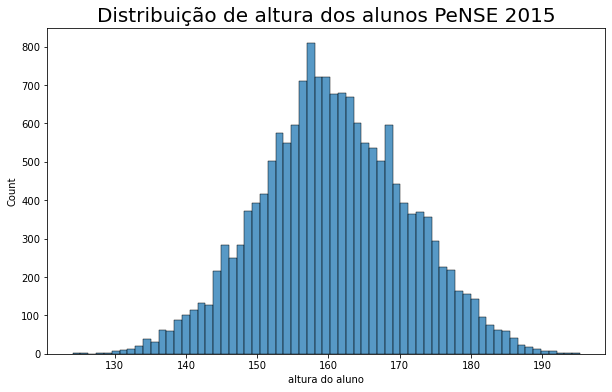

In [39]:
ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de altura dos alunos PeNSE 2015', fontsize=20)
ax

Histogramas são uma forma visual de condensar vários parâmetros estatisticos em um gráfico. Por exemplo, a medida de tendência central **mediana** de um histograma representa o valor mais provável da altura de um aluno escolhido aleatóriamente, já o **desvio padrão** que entra na categoria de medidas de dispersão representa o quanto as alturas dos alunos variam em torno da *mediana*.

In [40]:
from matplotlib import pyplot as plt

<AxesSubplot:title={'center':'Distribuição de altura dos alunos PeNSE 2015'}, xlabel='altura do aluno', ylabel='Count'>

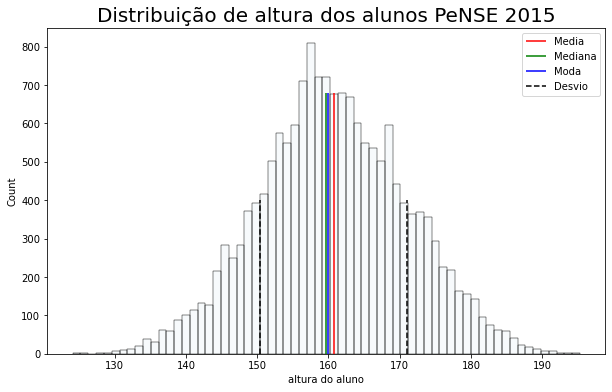

In [41]:
media = dados_selecionados['altura do aluno'].mean()
moda = dados_selecionados['altura do aluno'].value_counts().reset_index()['index'][0]
mediana = (dados_selecionados['altura do aluno'].max() + dados_selecionados['altura do aluno'].min())/2
desvio = dados_selecionados['altura do aluno'].std()


ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno', alpha=0.03)
ax.vlines(media, 0, 680, label='Media', color='red')
ax.vlines(mediana, 0, 680, label='Mediana', color='green')
ax.vlines(moda, 0, 680, label='Moda', color='blue')
ax.vlines(media + desvio, 0, 400, color='black', linestyles='dashed')
ax.vlines(media - desvio, 0, 400, color='black', label='Desvio', linestyles='dashed')

ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de altura dos alunos PeNSE 2015', fontsize=20)
ax.legend()
ax

Voltando a lei de Sturges a quantidade ideal de grupos era 15:


> **Obs**: Existem várias outras técnicas de estimar o número de "caixinhas" de um histograma atraǘes do hiper parâmetro `bins`. O `Seaborn` usa o módulo `Numpy` por trás dos panos e ela trás várias técnicas aqui: https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges


#### As técnicas que podem ser passadas como hiperparâmetros são: 
> `auto`: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.

> `fd`: (Freedman Diaconis Estimator): Robust (resilient to outliers) estimator that takes into account data variability and data size.

> `doane`: An improved version of Sturges’ estimator that works better with non-normal datasets.

> `scott`: Less robust estimator that that takes into account data variability and data size.

> `stone`: Estimator based on leave-one-out cross-validation estimate of the integrated squared error. Can be regarded as a generalization of Scott’s rule.

> `rice`: Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.

> `sturges`: R’s default method, only accounts for data size. Only optimal for gaussian data and underestimates number of bins for large non-gaussian datasets.

> `sqrt`: Square root (of data size) estimator, used by Excel and other programs for its speed and simplicity.


<AxesSubplot:title={'center':'Distribuição de altura dos alunos PeNSE 2015'}, xlabel='altura do aluno', ylabel='Count'>

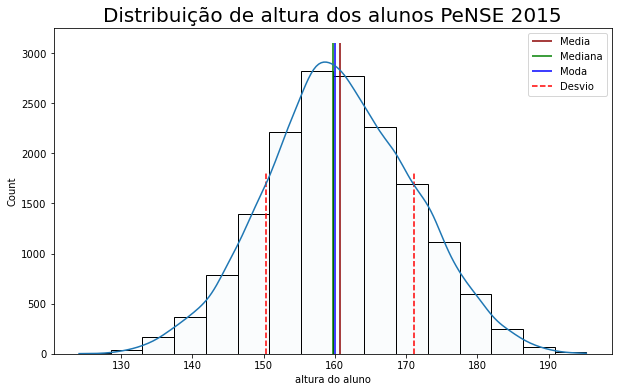

In [42]:
ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',bins='sturges', alpha=0.02, kde=True)
ax.vlines(media, 0, 3100, label='Media', color='darkred')
ax.vlines(mediana, 0, 3100, label='Mediana', color='green')
ax.vlines(moda, 0, 3100, label='Moda', color='blue')
ax.vlines(media + desvio, 0, 1800, color='red', linestyles='dashed')
ax.vlines(media - desvio, 0, 1800, color='red', label='Desvio', linestyles='dashed')

ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de altura dos alunos PeNSE 2015', fontsize=20)
ax.legend()
ax

### Comparando dois histogramas

Como passamos o dataframe atráves do parâmetro `data` podemos utilizar outro parametro chamado de `hue`, ou seja uma tonalidade, e essa tonalidade será de acordo com o sexo, por exemplo: 

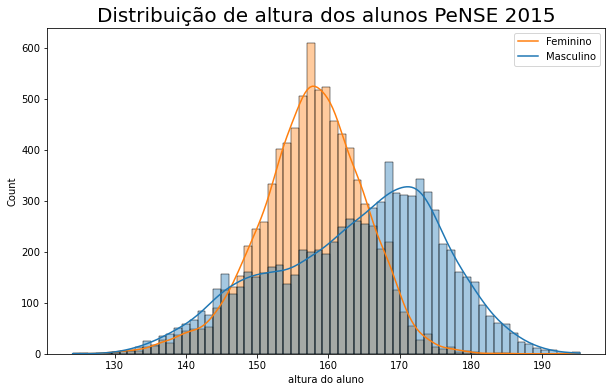

In [43]:
media = dados_selecionados['altura do aluno'].mean()
moda = dados_selecionados['altura do aluno'].value_counts().reset_index()['index'][0]
mediana = (dados_selecionados['altura do aluno'].max() + dados_selecionados['altura do aluno'].min())/2
desvio = dados_selecionados['altura do aluno'].std()

ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',
                  hue='sexo', kde=True,
                  palette='tab10', alpha=0.4)
ax.legend(['Feminino', 'Masculino'])
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de altura dos alunos PeNSE 2015', fontsize=20)
ax;

O histograma é uma excelente forma de visualizar distribuições de dados, entretanto, note que se tivermos muitas categorias fica difícil de analisar o problema, por exemplo o `peso do aluno` de acordo com a `esfera administrativa da escola`

<AxesSubplot:title={'center':'Distribuição dos pesos dos alunos PeNSE 2015'}, xlabel='peso do aluno', ylabel='Count'>

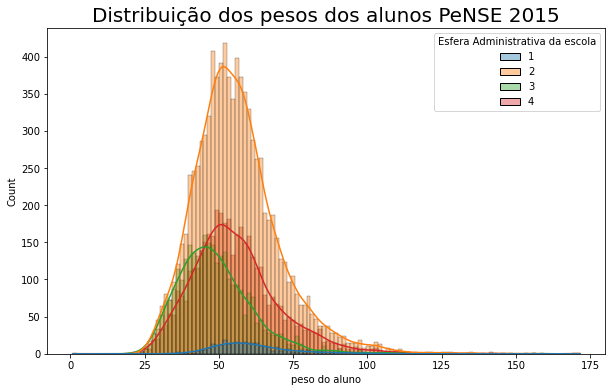

In [44]:
ax = sns.histplot(data=dados_selecionados,
                  x='peso do aluno',
                  hue='Esfera Administrativa da escola', kde=True,
                  palette='tab10', alpha=0.4, legend=True)
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição dos pesos dos alunos PeNSE 2015', fontsize=20)
ax

Mas pode ficar ainda pior, vamos supor que a olhemos a `altura do aluno` pela idade dele: 

<AxesSubplot:title={'center':'Distribuição das alturas de acordo com a idade dos alunos PeNSE 2015'}, xlabel='VB17004', ylabel='Count'>

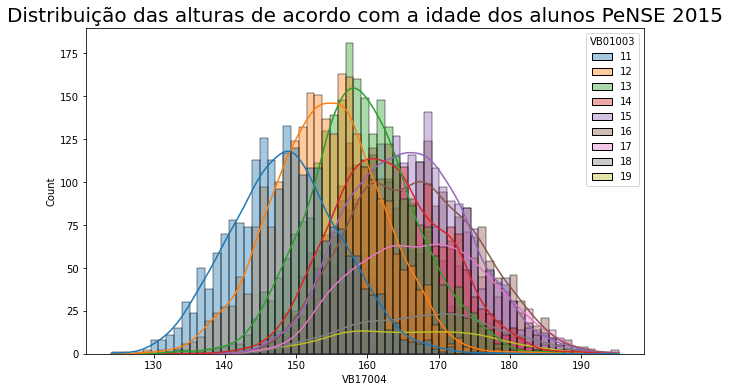

In [45]:
ax = sns.histplot(data=dados,
                  x='VB17004',
                  hue='VB01003', kde=True,
                  palette='tab10', alpha=0.4, legend=True)
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição das alturas de acordo com a idade dos alunos PeNSE 2015', fontsize=20)
ax

Não da pra concluir nada com esta bagunça. Para evitar essa monstruosidade gráfica utilizamos uma outra representação muito mais organizada chamada **Boxplot**.

### BoxPlot

O boxplot é uma representação gráfica que pode ser usada pra ilustrar informações além dos histogramas, por exemplo, num histograma a informação da mediana e desvio padrão pode ser um tanto subjetiva, já no boxplot é intuitivo.Além disso, o boxplot informa os intervalos inter quartis. Podemos consultar os IQQ usando a função `quantile()` do `pandas`. Para utilizar o boxplot no seaborn:

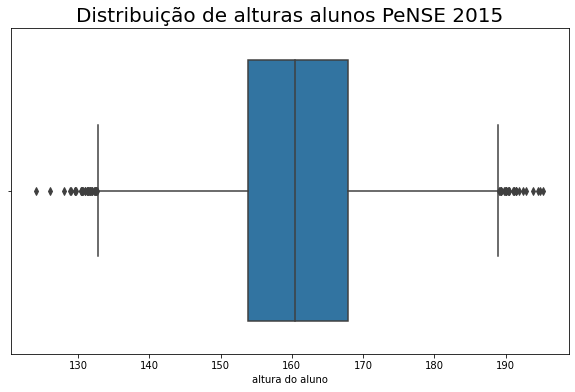

In [46]:
ax = sns.boxplot(data=dados_selecionados,
                  x='altura do aluno', palette='tab10')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de alturas alunos PeNSE 2015', fontsize=20)
ax;

In [62]:
print('Primeiro Quartil: ',dados_selecionados['altura do aluno'].quantile(0.25))

print('Segundo Quartil: ',dados_selecionados['altura do aluno'].quantile(0.50))

print('Terceiro Quartil: ',dados_selecionados['altura do aluno'].quantile(0.75))

print('Quarto Quartil: ',dados_selecionados['altura do aluno'].quantile(1))

Primeiro Quartil:  153.8
Segundo Quartil:  160.4
Terceiro Quartil:  167.9
Quarto Quartil:  195.3


A caixa no meio representa o intervalo interquartil, ou seja, 50% dos dados estão dentro deste intervalo. Á esquerda até a linha vertical temos o primeiro quartil e a direita da caixa até a outra barra vertical temos o quarto quartil. 

Os pontos abaixo do primeiro quartil e acima do quarto quartil são chamados de **outliers**, são pontos que precisam ser investigados com mais calma pois podem conter erros na coletas de dados. O módulo `Seaborn` qualifica esses pontos experimentais como sendo outlier através da técnica chamada **inter-quartile range**.

> O Inter-Quartile-Range, espalhamento médio (midspread) ou H-spread é uma técnica de estatistica descritiva. Faz parte da categoria de medidas de dispersão estatistica. Basicamente o comprimento do intervalo interquartil $IQR$ é a diferença entre o terceiro quartil $Q3$ e o primeiro quartil $Q1$. Utilizando a imagem fica mais fácil de compreender:

$$\text{IQR} = Q3 − Q1$$


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png' width=45%>


Também é possível usar dois boxplots numa única figura:

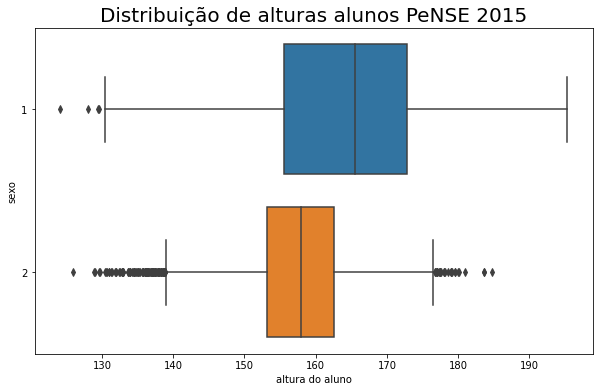

In [47]:
ax = sns.boxplot(data=dados_selecionados,
                 x='altura do aluno', y='sexo',
                 orient='h', palette='tab10')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de alturas alunos PeNSE 2015', fontsize=20)
ax;

Quando vamos visualizar mais de um boxplot na mesma figura é importante especificar a orientação da entidade através do parâmetro `orient`, isso porque na vertical ocorre um problema de visualização.

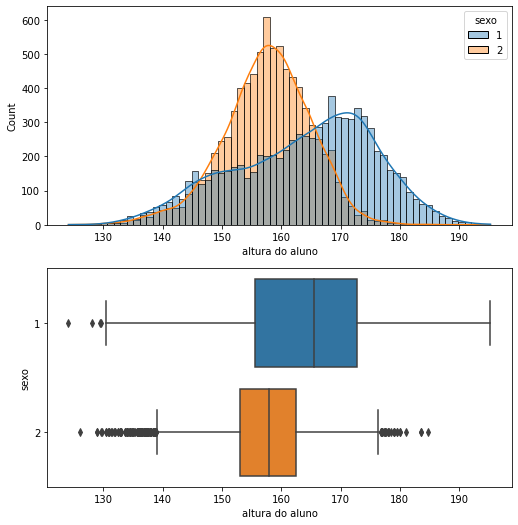

In [65]:
plt.figure(figsize= 1.3 *np.array([6.4, 6.8]))
plt.subplot(2,1,1)
axs = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',
                  hue='sexo', kde=True,
                  palette='tab10', alpha=0.4)
plt.subplot(2,1,2)
axs = sns.boxplot(data=dados_selecionados,
                 x='altura do aluno', y='sexo',
                 orient='h', palette='tab10')


Note que ambos os gráficos trazem informações, entretando o boxplot é muito mais claro com suas informações. Só de olhar podemos verificar que a quantidade de outliers nos dados de altura na categoria sexo feminino é maior do que na categoria masculino. É possível concluir isso apenas olhando a quantidade de pontos fora das linhas verticais dos quartis. 

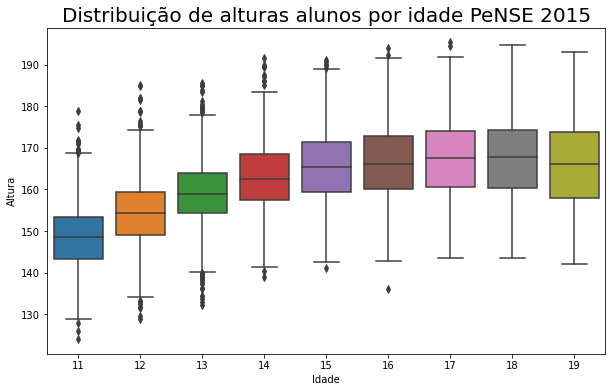

In [73]:
ax = sns.boxplot(data=dados,
                 x='VB01003', y='VB17004', palette='tab10')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de alturas alunos por idade PeNSE 2015', fontsize=20)
plt.xlabel('Idade')
plt.ylabel('Altura')
ax;

Note que com vários boxplots conseguimos comparar simultaneamente várias distribuições de dados. Uma conclusão é que

> 1. *alunos de 11 anos tem uma mediana menor do que alunos mais velhos.*

> 2. *dos 11 as 15 anos a taxa de crescimento dos alunos é maior do que dos 15 aos 19 anos...*

É possível também criar além desta categorização das idades sperar por sexo, usando o parâmetro `hue`: 

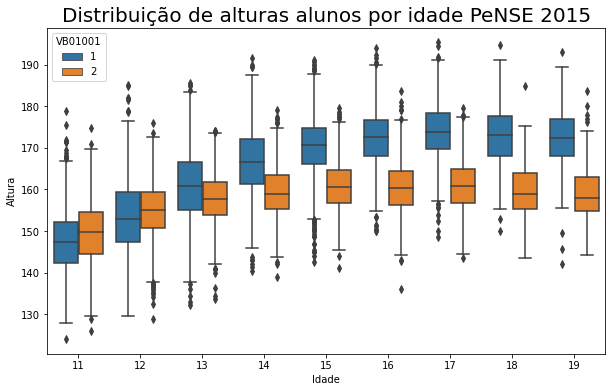

In [77]:
ax = sns.boxplot(data=dados,
                 x='VB01003', y='VB17004', palette='tab10', hue='VB01001')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de alturas alunos por idade PeNSE 2015', fontsize=20)
plt.xlabel('Idade')
plt.ylabel('Altura')
ax;

É possível verificar que mediana das alturas de cada sexo é diferente. É importante salientar que esses dados não são uma série temporal apesar de mostrar idades no eixo X, a pesquisa foi realizada no ano de 2015 ou seja, são alunos com 11 anos em 2015, 12 anos em 2015, 13 anos em 2015, e assim por diante... Até porque nem faz sentido, por exemplo a diminuição da mediana dos 18 aos 19 anos no sexo feminino, as pessoas não encolheram (HAHA).

Outro ponto é que a taxa de variação das alturas entre os alunos do sexo feminino e masculino é diferente. Lembrando quê essas informações são referentes a amostra do PeNSE 2015. Então é preciso verificar mais a fundo se as condições para estimar os parâmetros da população são satisfeitas.